# Deep Neural Network Classifier for ResNet50 Feature-Based Image Classification

In [ ]:
import h5py
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

# Load data from HDF5 file
features_hdf5_path = '/content/drive/MyDrive/Final DataSet/Final/ResNet50_Features_with_labels.h5'
with h5py.File(features_hdf5_path, 'r') as f:
    X = f['features'][:]
    y = f['labels'][:]

# Step 2: Convert string labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode labels to integers

# Step 3: Preprocess the labels (one-hot encoding)
y_one_hot = to_categorical(y_encoded)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Step 5: Define the neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_one_hot.shape[1], activation='softmax'))  # Output layer

# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 7: Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Step 11: Save the trained model
model.save('/content/drive/MyDrive/Final DataSet/Final/Resnet_Neural_Network_model.h5')

# Optional: Save the label encoder for decoding predictions later
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.7471 - loss: 1.0185 - val_accuracy: 0.9098 - val_loss: 0.2748
Epoch 2/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8846 - loss: 0.3613 - val_accuracy: 0.9270 - val_loss: 0.2408
Epoch 3/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9053 - loss: 0.3017 - val_accuracy: 0.9323 - val_loss: 0.2212
Epoch 4/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9162 - loss: 0.2610 - val_accuracy: 0.9338 - val_loss: 0.2125
Epoch 5/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9209 - loss: 0.2398 - val_accuracy: 0.9315 - val_loss: 0.2137
Epoch 6/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9270 - loss: 0.2291 - val_accuracy: 0.9364 - val_loss: 0.1962
Epoch 7/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9336 - loss: 0.2107 - val_accuracy: 0.9364 - val_loss: 0.1958
Epoch 8/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9365 - loss: 0

In [ ]:
# Step 8: Evaluate the model on both training and testing sets
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(f'\nTraining accuracy: {train_acc:.2f}')
print(f'Testing accuracy: {test_acc:.2f}')

# Step 9: Make predictions for both training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert one-hot predictions to class indices
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Convert one-hot labels to class indices
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Step 10: Print evaluation metrics for training set
print("\nTraining Set Metrics:")
print(f"Accuracy: {accuracy_score(y_train_classes, y_train_pred_classes):.2f}")
print(f"Classification Report:\n{classification_report(y_train_classes, y_train_pred_classes)}")
print("Confusion Matrix:")
print(confusion_matrix(y_train_classes, y_train_pred_classes))

# Step 10: Print evaluation metrics for testing set
print("\nTesting Set Metrics:")
print(f"Accuracy: {accuracy_score(y_test_classes, y_test_pred_classes):.2f}")
print(f"Classification Report:\n{classification_report(y_test_classes, y_test_pred_classes)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_test_pred_classes))

835/835 - 3s - 4ms/step - accuracy: 0.9942 - loss: 0.0372
209/209 - 1s - 4ms/step - accuracy: 0.9477 - loss: 0.4480

Training accuracy: 0.99
Testing accuracy: 0.95
835/835 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Training Set Metrics:
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8591
           1       0.98      0.98      0.98      2061
           2       0.99      0.99      0.99      2012
           3       1.00      0.99      0.99      2123
           4       0.99      0.99      0.99      2197
           5       0.99      0.99      0.99      1911
           6       1.00      1.00      1.00      2021
           7       1.00      1.00      1.00      1995
           8       0.99      0.99      0.99      1831
           9       1.00      1.00      1.00      1970

    accuracy                           0.99     26712
   macro avg       0.99      0.99      0.99

Epoch 1/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9900 - loss: 0.0453 - val_accuracy: 0.9472 - val_loss: 0.3880
Epoch 2/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9866 - loss: 0.0588 - val_accuracy: 0.9502 - val_loss: 0.3315
Epoch 3/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9860 - loss: 0.0576 - val_accuracy: 0.9491 - val_loss: 0.3513
Epoch 4/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9876 - loss: 0.0535 - val_accuracy: 0.9510 - val_loss: 0.3669
Epoch 5/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9874 - loss: 0.0626 - val_accuracy: 0.9502 - val_loss: 0.3198
Epoch 6/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9856 - loss: 0.0573 - val_accuracy: 0.9506 - val_loss: 0.3584
Epoch 7/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9874 - loss: 0.0507 - val_accuracy: 0.9510 - val_loss: 0.3327
Epoch 8/100
752/752 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9853 - loss: 0

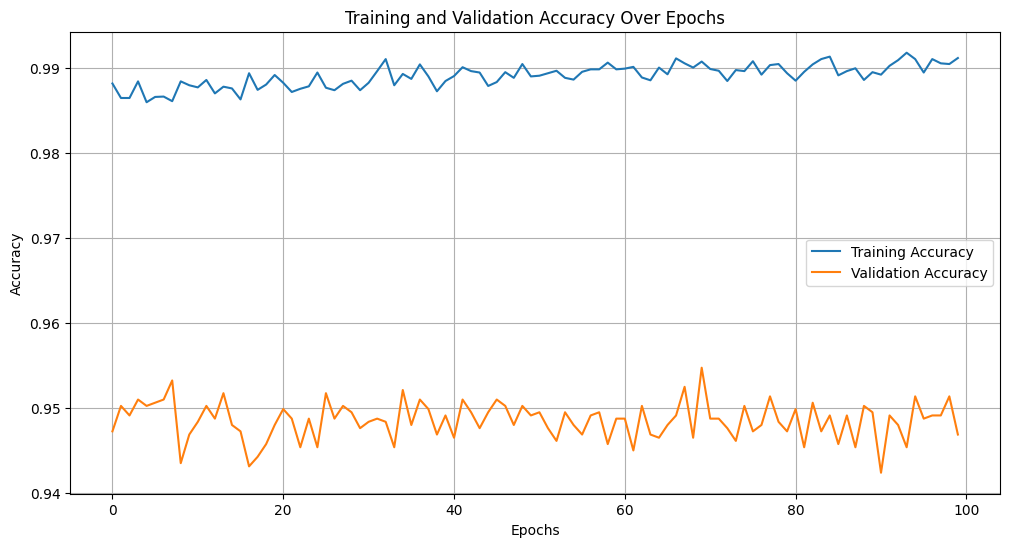

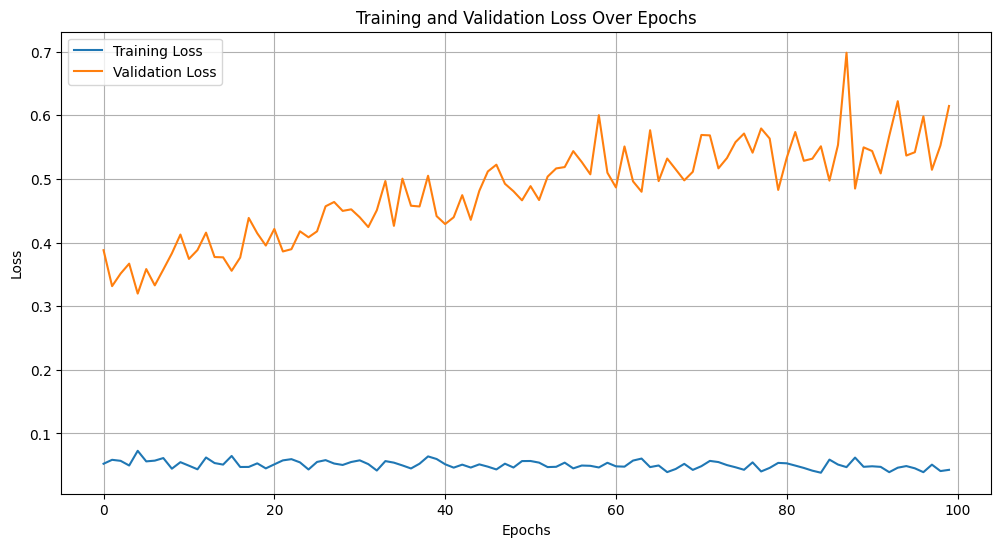

In [ ]:
import matplotlib.pyplot as plt

# Step 7: Train the model and save the history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Step 8: Visualize training accuracy and loss
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
def visualize_metrics(metrics, train_labels, test_labels):
    # Convert one-hot encoded labels back to integer labels
    train_labels_int = np.argmax(train_labels, axis=1)
    test_labels_int = np.argmax(test_labels, axis=1)

    # Print metrics
    print(f"Training Accuracy: {metrics['train_accuracy'] * 100:.2f}%")
    print(f"Testing Accuracy: {metrics['test_accuracy'] * 100:.2f}%")
    print(f"Training Log Loss: {metrics['train_log_loss']:.4f}")
    print(f"Testing Log Loss: {metrics['test_log_loss']:.4f}")
    print(f"Training ROC-AUC Score: {metrics['train_roc_auc']:.4f}")
    print(f"Testing ROC-AUC Score: {metrics['test_roc_auc']:.4f}")
    print("\nClassification Report - Training Data:")
    print(metrics['train_classification_report'])
    print("\nClassification Report - Testing Data:")
    print(metrics['test_classification_report'])

    # Confusion Matrices
    plt.figure(figsize=(10, 5))
    sns.heatmap(metrics['train_conf_matrix'], annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix - Training Data")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.heatmap(metrics['test_conf_matrix'], annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix - Testing Data")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # ROC-AUC Curve
    n_classes = test_labels.shape[1]  # Number of unique classes
    test_probabilities = metrics['test_probabilities']  # Predicted probabilities

    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(test_labels[:, i], test_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multi-Class ROC-AUC")
    plt.legend(loc="lower right")
    plt.show()


835/835 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Training Accuracy: 99.42%
Testing Accuracy: 94.34%
Training Log Loss: 0.0354
Testing Log Loss: 0.3586
Training ROC-AUC Score: 0.9998
Testing ROC-AUC Score: 0.9957

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8591
           1       0.99      0.98      0.98      2061
           2       0.99      0.99      0.99      2012
           3       1.00      0.99      0.99      2123
           4       0.98      0.99      0.99      2197
           5       0.99      1.00      0.99      1911
           6       1.00      1.00      1.00      2021
           7       1.00      1.00      1.00      1995
           8       0.99      0.99      0.99      1831
           9       1.00      1.00      1.00      1970

    accuracy                           0.99     26712
   macro avg       0.99      0.99      0.99     26712
weighted av

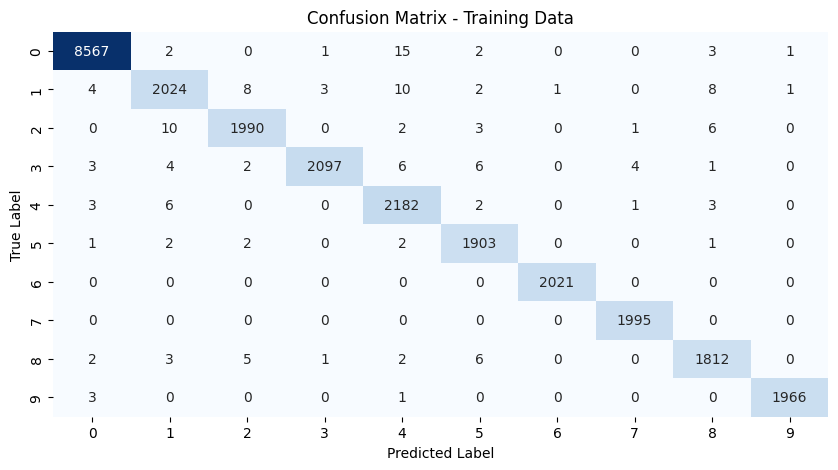

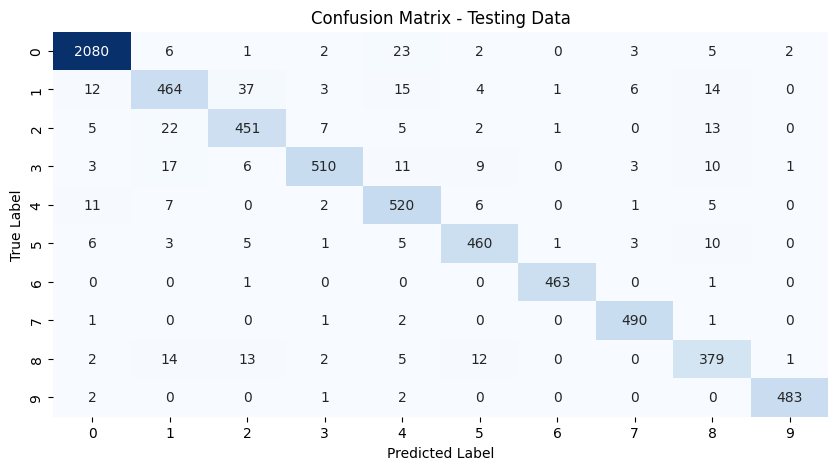

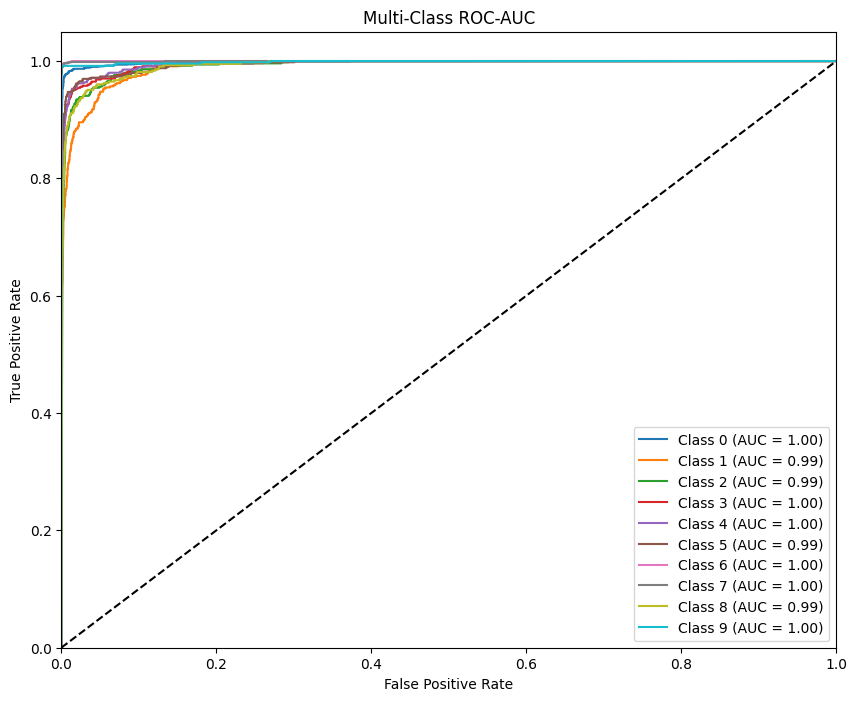

In [ ]:
metrics = evaluate_model(model, X_train, y_train, X_test, y_test)
visualize_metrics(metrics, y_train, y_test)

In [ ]:
import h5py
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load ResNet50 features and labels from HDF5 file
features_hdf5_path = '/content/drive/MyDrive/Final DataSet/Final/ResNet50_Features_with_labels.h5'
with h5py.File(features_hdf5_path, 'r') as f:
    X = f['features'][:]
    y = f['labels'][:]

# Convert string labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode labels to integers
num_classes = len(np.unique(y_encoded))  # Determine the number of classes

# Convert labels to one-hot encoding
y_one_hot = to_categorical(y_encoded, num_classes=num_classes)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Define the fully connected neural network
model = Sequential([
    Dense(512, activation='relu', input_shape=(X.shape[1],)),  # First hidden layer
    Dropout(0.5),  # Dropout for regularization
    Dense(256, activation='relu'),  # Second hidden layer
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,  # Adjust based on dataset size
    batch_size=32,
    validation_split=0.1  # Use 10% of training data for validation
)

# Save the trained model
model_save_path = '/content/drive/MyDrive/Final DataSet/Final/FCNN_ResNet_Classifier.h5'
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# Save the label encoder for decoding predictions later
label_encoder_save_path = '/content/drive/MyDrive/Final DataSet/Final/label_encoder.pkl'
with open(label_encoder_save_path, 'wb') as file:
    pickle.dump(label_encoder, file)
print(f"Label encoder saved to {label_encoder_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.7535 - loss: 0.9885 - val_accuracy: 0.9150 - val_loss: 0.2481
Epoch 2/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.8886 - loss: 0.3477 - val_accuracy: 0.9068 - val_loss: 0.2723
Epoch 3/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9045 - loss: 0.2959 - val_accuracy: 0.9274 - val_loss: 0.2180
Epoch 4/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9209 - loss: 0.2473 - val_accuracy: 0.9360 - val_loss: 0.2087
Epoch 5/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9280 - loss: 0.2266 - val_accuracy: 0.9278 - val_loss: 0.2189
Epoch 6/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9313 - loss: 0.2180 - val_accuracy: 0.9356 - val_loss: 0.2025
Epoch 7/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.9385 - loss: 0.1958 - val_accuracy: 0.9349 - val_loss: 0.2004
Epoch 8/50
752/752 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9360 - loss: 0.2050 - 

Model saved to /content/drive/MyDrive/Final DataSet/Final/FCNN_ResNet_Classifier.h5
Label encoder saved to /content/drive/MyDrive/Final DataSet/Final/label_encoder.pkl


In [ ]:
import h5py
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

# Load data from HDF5 file
features_hdf5_path = '/content/drive/MyDrive/Final DataSet/Final/ResNet50_Features_with_labels.h5'
with h5py.File(features_hdf5_path, 'r') as f:
    X = f['features'][:]
    y = f['labels'][:]

# Step 2: Convert string labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode labels to integers

# Step 3: Preprocess the labels (one-hot encoding)
y_one_hot = to_categorical(y_encoded)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Step 5: Define the neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_one_hot.shape[1], activation='softmax'))  # Output layer

# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 7: Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Step 11: Save the trained model
model.save('/content/drive/MyDrive/Final DataSet/Final/Resnet_Classifier_Basic_model_20.h5')

# Optional: Save the label encoder for decoding predictions later
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.7529 - loss: 1.0170 - val_accuracy: 0.9019 - val_loss: 0.2946
Epoch 2/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.8807 - loss: 0.3719 - val_accuracy: 0.9180 - val_loss: 0.2396
Epoch 3/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9065 - loss: 0.2943 - val_accuracy: 0.9218 - val_loss: 0.2320
Epoch 4/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9142 - loss: 0.2645 - val_accuracy: 0.9233 - val_loss: 0.2293
Epoch 5/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9250 - loss: 0.2368 - val_accuracy: 0.9259 - val_loss: 0.2110
Epoch 6/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9301 - loss: 0.2178 - val_accuracy: 0.9278 - val_loss: 0.2209
Epoch 7/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9332 - loss: 0.2110 - val_accuracy: 0.9379 - val_loss: 0.1951
Epoch 8/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9418 - loss: 0.1879 - 

In [ ]:
# Step 8: Evaluate the model on both training and testing sets
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(f'\nTraining accuracy: {train_acc:.2f}')
print(f'Testing accuracy: {test_acc:.2f}')

# Step 9: Make predictions for both training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert one-hot predictions to class indices
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Convert one-hot labels to class indices
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Step 10: Print evaluation metrics for training set
print("\nTraining Set Metrics:")
print(f"Accuracy: {accuracy_score(y_train_classes, y_train_pred_classes):.2f}")
print(f"Classification Report:\n{classification_report(y_train_classes, y_train_pred_classes)}")
print("Confusion Matrix:")
print(confusion_matrix(y_train_classes, y_train_pred_classes))

# Step 10: Print evaluation metrics for testing set
print("\nTesting Set Metrics:")
print(f"Accuracy: {accuracy_score(y_test_classes, y_test_pred_classes):.2f}")
print(f"Classification Report:\n{classification_report(y_test_classes, y_test_pred_classes)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_test_pred_classes))

835/835 - 5s - 6ms/step - accuracy: 0.9862 - loss: 0.0506
209/209 - 1s - 4ms/step - accuracy: 0.9400 - loss: 0.2345

Training accuracy: 0.99
Testing accuracy: 0.94
835/835 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Training Set Metrics:
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8591
           1       0.98      0.94      0.96      2061
           2       0.96      0.98      0.97      2012
           3       0.99      0.98      0.99      2123
           4       0.95      0.99      0.97      2197
           5       0.99      0.99      0.99      1911
           6       1.00      1.00      1.00      2021
           7       1.00      1.00      1.00      1995
           8       0.98      0.96      0.97      1831
           9       1.00      1.00      1.00      1970

    accuracy                           0.99     26712
   macro avg       0.98      0.98      0.98

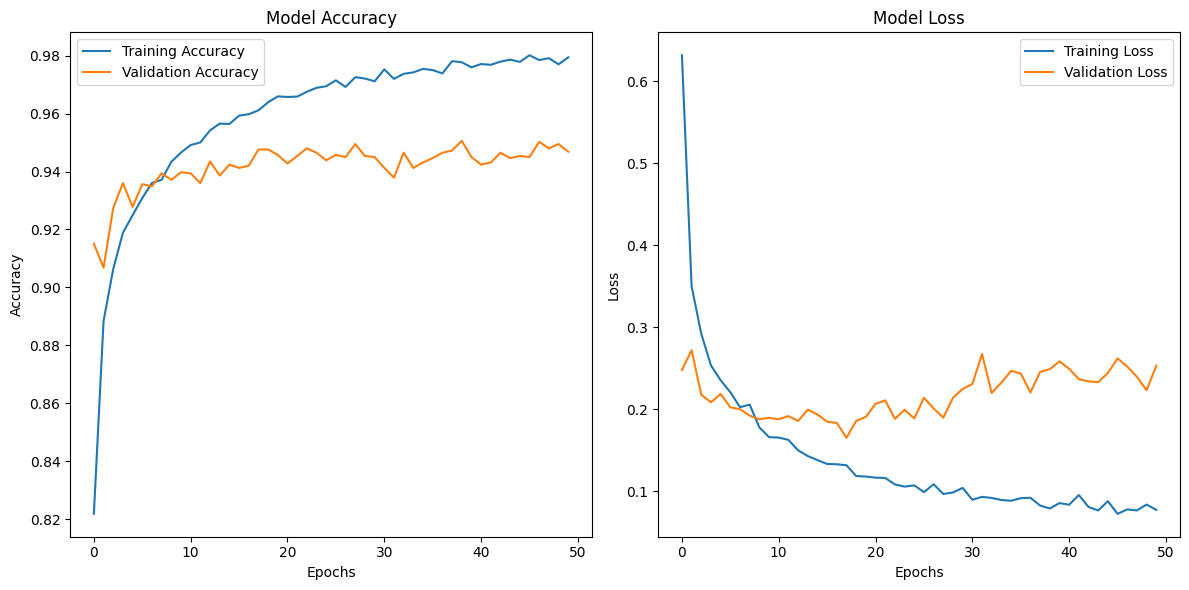

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()